In [7]:
import pandas as pd

ds = pd.read_csv('LoRaWAN_Path_Loss_Measurement_Campaign_V2.csv', index_col=0)

In [6]:
ds

,timestamp,device_id,distance,ht,hr,ptx,ltx,gtx,lrx,grx,...,rh,bp,pm2_5,rssi,snr,toa,experimental_pl,energy,esp,pn
index,,,,,,,,,,,,,,,,,,,,,
1,4/11/2021 16:24,EN1,2140,40.0,5,20,1.0,2.9955,4.25,4.16094,...,56.2,852.3,6.0,-72,7.8,0.205824,93.90644,0.0880,-72.666832,-80.466832
2,4/11/2021 16:25,EN1,2140,40.0,5,20,1.0,2.9955,4.25,4.16094,...,55.5,852.3,18.0,-77,6.5,0.246784,98.90644,0.0961,-77.877360,-84.377360
3,4/11/2021 16:26,EN1,2140,40.0,5,20,1.0,2.9955,4.25,4.16094,...,54.9,852.3,23.0,-73,6.2,0.287744,94.90644,0.1273,-73.933808,-80.133808
4,4/11/2021 16:27,EN1,2140,40.0,5,20,1.0,2.9955,4.25,4.16094,...,54.8,852.4,51.0,-77,6.0,0.328704,98.90644,0.1302,-77.973228,-83.973228
5,4/11/2021 16:28,EN1,2140,40.0,5,20,1.0,2.9955,4.25,4.16094,...,55.1,852.3,42.0,-73,7.0,0.288768,94.90644,0.1263,-73.790097,-80.790097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930749,25/03/2022 5:25,EN4,8260,12.0,5,20,1.0,8.5360,4.25,4.16094,...,77.3,845.4,0.0,-86,-5.5,0.246272,113.44690,0.1060,-92.578332,-87.078332
930750,25/03/2022 5:26,EN4,8260,12.0,5,20,1.0,8.5360,4.25,4.16094,...,77.9,845.4,0.0,-88,-5.5,0.369152,115.44690,0.1488,-94.578332,-89.078332
930751,25/03/2022 5:27,EN4,8260,12.0,5,20,1.0,8.5360,4.25,4.16094,...,76.3,845.4,0.0,-86,-4.8,0.144384,113.44690,0.0651,-92.042208,-87.242208


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
# Computes feature correlation
def compute_corr(df, method):
    df_corr = df.corr(method=method)

    # Create labels for the correlation matrix
    labels = np.where(np.abs(df_corr)>0.75, "S",
                    np.where(np.abs(df_corr)>0.5, "M",
                            np.where(np.abs(df_corr)>0.25, "W", "")))

    # Plot correlation matrix
    plt.figure(figsize=(10, 10))
    sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
                center=0, annot=labels, fmt='', linewidths=.5,
                cmap="vlag", cbar_kws={"shrink": 0.8});

### Pearson’s Correlation Coefficient

**Pearson’s correlation coefficient** (denoted as \( r \)) is a **measure of the linear relationship** between two continuous variables. It tells you how strongly two variables are related in a linear fashion and the direction of that relationship.

### Key Concepts of Pearson’s Correlation

1. **Linear Relationship**:
   - Pearson's correlation measures how well the relationship between two variables can be described with a straight line.
   - If two variables are **perfectly linearly related**, the value of \( r \) will be either +1 (positive correlation) or -1 (negative correlation).
   
2. **Direction**:
   - If \( r \) is **positive**, as one variable increases, the other variable also increases (positive correlation).
   - If \( r \) is **negative**, as one variable increases, the other decreases (negative correlation).
   - If \( r \) is **zero**, it indicates **no linear relationship** between the two variables.

3. **Strength of the Relationship**:
   - The closer \( r \) is to +1 or -1, the **stronger** the linear relationship.
   - If \( r = 0 \), there is **no linear correlation**.

### Pearson’s Correlation Coefficient Formula

The formula for calculating Pearson's correlation coefficient is:

\[
r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}}
\]

Where:
- \( X_i \) and \( Y_i \) are the individual data points for variables \( X \) and \( Y \),
- \( \bar{X} \) and \( \bar{Y} \) are the mean values of \( X \) and \( Y \),
- \( \sum \) denotes summation over all the data points.

The numerator represents the **covariance** between \( X \) and \( Y \), while the denominator normalizes the covariance by the **standard deviations** of \( X \) and \( Y \).

### Steps to Calculate Pearson’s Correlation

1. **Calculate the Means** of \( X \) and \( Y \).
2. **Find the Deviations**: Subtract the mean from each \( X \) and \( Y \) value.
3. **Multiply the Deviations**: Multiply the deviations for each pair of data points (i.e., \( (X_i - \bar{X})(Y_i - \bar{Y}) \)).
4. **Sum the Products**: Sum these multiplied values.
5. **Compute the Denominator**: Calculate the standard deviations of \( X \) and \( Y \), and multiply them.
6. **Divide**: Divide the sum of the products by the product of the standard deviations.

### Example Calculation

Let’s calculate Pearson’s correlation using this dataset:

| Observation | \( X \) | \( Y \) |
|-------------|---------|---------|
| 1           | 85      | 60      |
| 2           | 98      | 80      |
| 3           | 91      | 70      |
| 4           | 102     | 85      |
| 5           | 100     | 78      |

**Step 1: Calculate the means** of \( X \) and \( Y \):

\[
\bar{X} = \frac{85 + 98 + 91 + 102 + 100}{5} = 95.2
\]
\[
\bar{Y} = \frac{60 + 80 + 70 + 85 + 78}{5} = 74.6
\]

**Step 2: Calculate the deviations** from the means for \( X \) and \( Y \):

| Observation | \( X_i - \bar{X} \) | \( Y_i - \bar{Y} \) |
|-------------|---------------------|---------------------|
| 1           | \( 85 - 95.2 = -10.2 \) | \( 60 - 74.6 = -14.6 \) |
| 2           | \( 98 - 95.2 = 2.8 \)  | \( 80 - 74.6 = 5.4 \)  |
| 3           | \( 91 - 95.2 = -4.2 \) | \( 70 - 74.6 = -4.6 \) |
| 4           | \( 102 - 95.2 = 6.8 \) | \( 85 - 74.6 = 10.4 \) |
| 5           | \( 100 - 95.2 = 4.8 \) | \( 78 - 74.6 = 3.4 \)  |

**Step 3: Multiply the deviations** for each pair:

| Observation | \( (X_i - \bar{X})(Y_i - \bar{Y}) \) |
|-------------|--------------------------------------|
| 1           | \( (-10.2) \times (-14.6) = 148.92 \) |
| 2           | \( (2.8) \times (5.4) = 15.12 \)      |
| 3           | \( (-4.2) \times (-4.6) = 19.32 \)    |
| 4           | \( (6.8) \times (10.4) = 70.72 \)     |
| 5           | \( (4.8) \times (3.4) = 16.32 \)      |

The sum of these products is:

\[
\sum (X_i - \bar{X})(Y_i - \bar{Y}) = 148.92 + 15.12 + 19.32 + 70.72 + 16.32 = 270.4
\]

**Step 4: Compute the standard deviations** of \( X \) and \( Y \):

The standard deviation of \( X \) is calculated as:

\[
\sigma_X = \sqrt{\frac{(-10.2)^2 + (2.8)^2 + (-4.2)^2 + (6.8)^2 + (4.8)^2}{5}} = \sqrt{\frac{104.04 + 7.84 + 17.64 + 46.24 + 23.04}{5}} = \sqrt{39.36} = 6.27
\]

Similarly, for \( Y \):

\[
\sigma_Y = \sqrt{\frac{(-14.6)^2 + (5.4)^2 + (-4.6)^2 + (10.4)^2 + (3.4)^2}{5}} = \sqrt{56.24} = 7.5
\]

**Step 5: Calculate Pearson’s correlation coefficient**:

\[
r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sigma_X \sigma_Y} = \frac{270.4}{6.27 \times 7.5} = \frac{270.4}{47.025} = 0.575
\]

So, Pearson’s correlation coefficient \( r \) is approximately **0.575**, indicating a **moderate positive linear relationship** between \( X \) and \( Y \).

### Interpretation of Pearson’s Correlation Coefficient

The value of \( r \) will always lie between -1 and 1:
- **\( r = 1 \)**: Perfect positive linear correlation.
- **\( r = -1 \)**: Perfect negative linear correlation.
- **\( r = 0 \)**: No linear correlation.

### Guidelines for Interpreting \( r \):
- \( 0.1 \leq |r| < 0.3 \): Weak correlation.
- \( 0.3 \leq |r| < 0.5 \): Moderate correlation.
- \( 0.5 \leq |r| < 1.0 \): Strong correlation.
- \( r = 0 \): No linear relationship.

### Pearson’s Correlation Assumptions

1. **Linearity**: Pearson’s correlation only measures linear relationships. If the relationship is non-linear but monotonic, Spearman’s correlation might be more appropriate.
2. **Continuous Data**: Both variables should be continuous.
3. **Normal Distribution**: Ideally, the variables should be normally distributed, though Pearson’s can be robust to slight deviations.
4. **No Outliers**: Outliers can skew the results, since Pearson’s correlation is sensitive to outliers.

### Pearson vs. Spearman Correlation

| Pearson’s Correlation \( r \)  | Spearman’s Correlation \( \rho \)  |
|------------------------------|-----------------------------------|
| Measures **linear** relationships. | Measures **monotonic** relationships (linear or non-linear). |
| Assumes normality and continuous data. | No assumptions about the distribution of the data. |
| Sensitive to outliers. | Less sensitive to outliers because it uses ranks. |
| Used for normally distributed data and relationships. | Used when the relationship is not linear but still monotonic. |


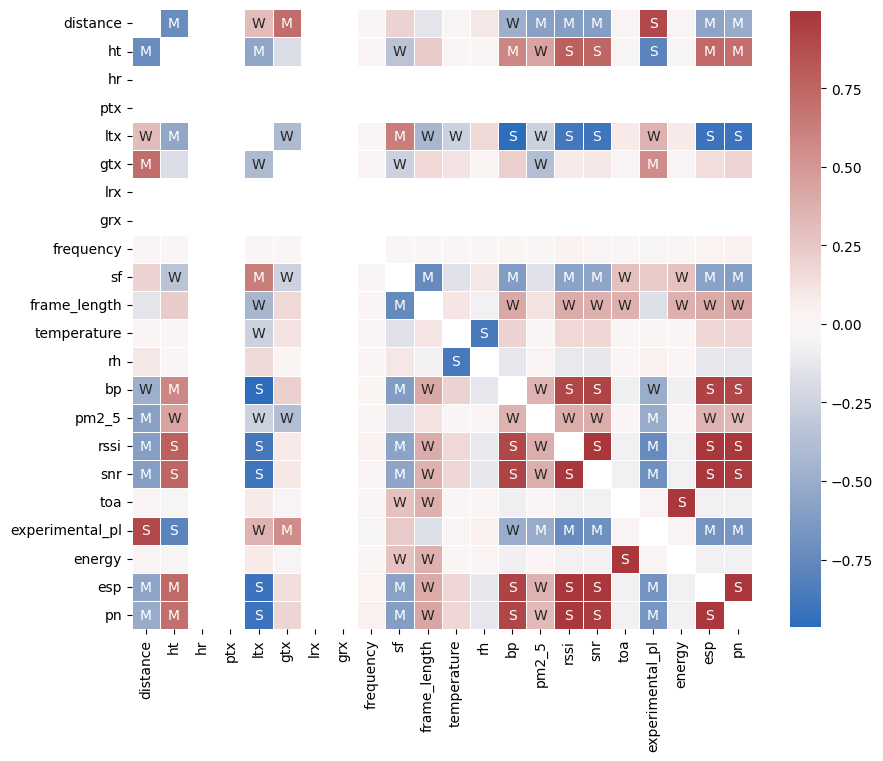

In [14]:
compute_corr(ds.drop(columns=['timestamp', 'device_id']), "pearson")

## Spearman’s Rank Correlation Coefficient

**Spearman’s rank correlation coefficient** (denoted as \( \rho \) or Spearman’s \( r_s \)) is a non-parametric measure of the strength and direction of association between two variables. It is based on the ranked values for each variable rather than the raw data. Like **Kendall’s Tau**, it evaluates **monotonic relationships** but differs in the way it calculates and handles ties in ranks.

#### Key Concepts

1. **Monotonic Relationship**: 
   Spearman’s correlation measures the strength and direction of a **monotonic** relationship, which means that as one variable increases, the other variable tends to either increase or decrease consistently (but not necessarily at a constant rate).

2. **Rank Transformation**:
   - The raw data are transformed into ranks.
   - If there are tied values (two or more values are the same), the average rank is used.
   - For example, in a list of values [5, 2, 7, 7, 3], the ranks would be [4, 1, 4.5, 4.5, 2], where the 7's share an average rank of 4.5.

#### Formula for Spearman’s \( \rho \)

The formula for Spearman's correlation coefficient is:

\[
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
\]

Where:
- \( d_i \) is the difference between the ranks of each pair of observations (i.e., the difference between the ranks of \( X \) and \( Y \) for each pair \( i \)).
- \( n \) is the number of observations.
- \( \sum d_i^2 \) is the sum of the squared differences between the ranks of each pair of data points.

### Steps to Calculate Spearman’s Rank Correlation Coefficient

Let’s go through an example:

#### Example:
Consider the following data for two variables \( X \) and \( Y \):

| Observation | \( X \) | \( Y \) |
|-------------|---------|---------|
| 1           | 102     | 82      |
| 2           | 98      | 100     |
| 3           | 105     | 90      |
| 4           | 92      | 75      |
| 5           | 110     | 85      |

**Step 1: Rank the Data**
Rank both the \( X \) and \( Y \) values.

| Observation | \( X \) | Rank \( X \) | \( Y \) | Rank \( Y \) |
|-------------|---------|--------------|---------|--------------|
| 1           | 102     | 3            | 82      | 4            |
| 2           | 98      | 4            | 100     | 1            |
| 3           | 105     | 2            | 90      | 3            |
| 4           | 92      | 5            | 75      | 5            |
| 5           | 110     | 1            | 85      | 2            |

**Step 2: Compute the Rank Differences**
Calculate the difference between the ranks \( d_i = \text{Rank}(X_i) - \text{Rank}(Y_i) \), and then square these differences \( d_i^2 \).

| Observation | Rank \( X \) | Rank \( Y \) | \( d_i = \text{Rank}(X_i) - \text{Rank}(Y_i) \) | \( d_i^2 \) |
|-------------|--------------|--------------|-----------------------------------------------|-------------|
| 1           | 3            | 4            | -1                                            | 1           |
| 2           | 4            | 1            | 3                                             | 9           |
| 3           | 2            | 3            | -1                                            | 1           |
| 4           | 5            | 5            | 0                                             | 0           |
| 5           | 1            | 2            | -1                                            | 1           |

**Step 3: Plug Values into the Formula**
Sum \( d_i^2 \) and use the formula for \( \rho \).

\[
\sum d_i^2 = 1 + 9 + 1 + 0 + 1 = 12
\]
The number of observations \( n = 5 \).

\[
\rho = 1 - \frac{6 \times 12}{5(5^2 - 1)} = 1 - \frac{72}{120} = 1 - 0.6 = 0.4
\]

So, Spearman’s rank correlation coefficient is \( \rho = 0.4 \), indicating a **moderate positive correlation**.

### Interpreting Spearman’s \( \rho \)
Spearman’s \( \rho \) is interpreted similarly to Pearson's correlation, but it reflects the rank-based (monotonic) relationship between the variables:
- **\( \rho = 1 \)**: Perfect positive monotonic relationship (as one variable increases, the other always increases).
- **\( \rho = -1 \)**: Perfect negative monotonic relationship (as one variable increases, the other always decreases).
- **\( \rho = 0 \)**: No monotonic relationship between the variables.

Values between:
- \( 0.1 \) and \( 0.3 \) indicate a weak positive correlation.
- \( 0.3 \) and \( 0.6 \) indicate a moderate correlation.
- \( 0.6 \) and \( 1 \) indicate a strong correlation (same for negative values).

### Differences Between Spearman and Pearson

- **Spearman’s rank correlation** measures **monotonic relationships** (the consistency of a variable's increase or decrease, regardless of the rate), whereas **Pearson’s correlation** measures **linear relationships**.
- Spearman’s correlation uses **ranked values**, making it **non-parametric** and less sensitive to outliers.
- Pearson's correlation requires both variables to be **continuous and normally distributed** for accurate results, while Spearman's rank correlation does not.

### When to Use Spearman’s Rank Correlation?
- When the relationship between variables is monotonic but not linear.
- When your data contain outliers or are not normally distributed.
- When you are working with ordinal data (where the values represent rankings rather than continuous measures).

### Python Implementation

Here’s how to calculate Spearman’s rank correlation in Python using `scipy`:

```python
import numpy as np
from scipy.stats import spearmanr

# Example data
x = np.array([102, 98, 105, 92, 110])
y = np.array([82, 100, 90, 75, 85])

# Calculate Spearman's rank correlation
rho, p_value = spearmanr(x, y)

print(f"Spearman's correlation coefficient: {rho}")
print(f"P-value: {p_value}")
```

This will give you both the Spearman correlation coefficient and the **p-value**, which tests the null hypothesis that the two variables are not correlated.

Let me know if you'd like further clarification or a more detailed code explanation!

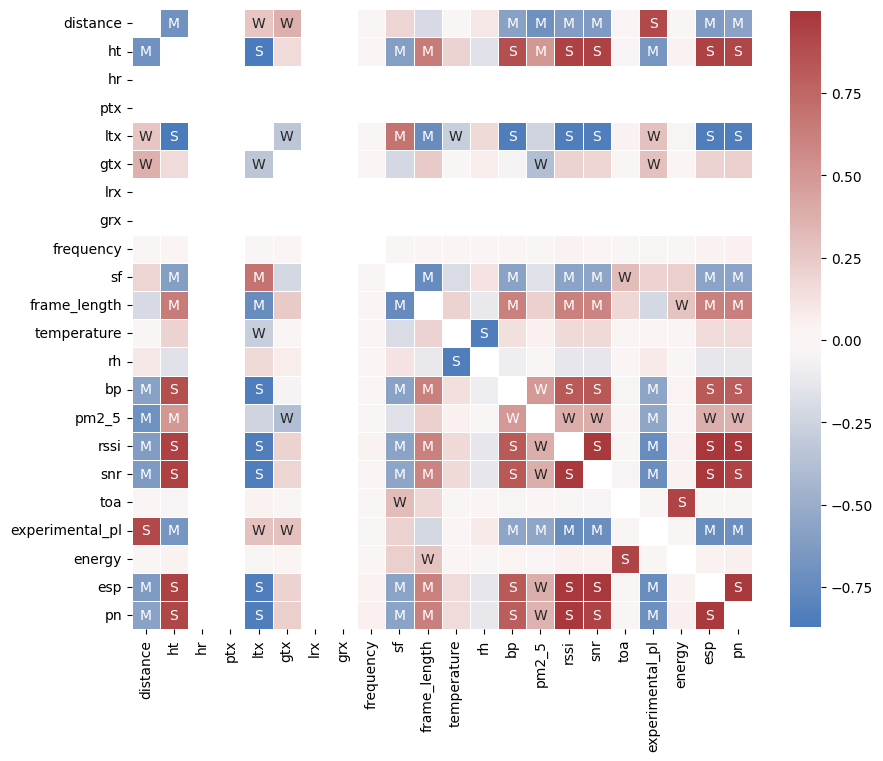

In [15]:
compute_corr(ds.drop(columns=['timestamp', 'device_id']), "spearman")

# Kendall’s Tau correlation coefficient
 (\( \tau \)) is a non-parametric measure of the strength and direction of association between two ranked variables. Unlike Pearson's correlation, which assumes linear relationships, Kendall’s Tau focuses on the ordinal (ranked) relationships between data points, making it a good choice for data that may not be normally distributed or that might not meet linearity assumptions.

Let's dive into it step-by-step:

### 1. **Understanding Concordant and Discordant Pairs**
   Kendall’s Tau is based on comparing pairs of observations to determine whether they have the same order in both variables:
   - **Concordant Pair**: If for a pair of observations \((x_i, y_i)\) and \((x_j, y_j)\), both values are ranked in the same direction — meaning, \( x_i < x_j \) and \( y_i < y_j \) (or \( x_i > x_j \) and \( y_i > y_j \)) — they are said to be concordant.
   - **Discordant Pair**: If they differ in direction, with one variable increasing while the other decreases — meaning \( x_i < x_j \) but \( y_i > y_j \), or vice versa — they are discordant.
   - **Ties**: If \( x_i = x_j \) or \( y_i = y_j \), they are tied in rank.

   The intuition is that more concordant pairs suggest a positive association, and more discordant pairs suggest a negative association.

### 2. **Formula for Kendall’s Tau**
   The coefficient \(\tau\) is defined as:

   \[
   \tau = \frac{(\text{Number of Concordant Pairs} - \text{Number of Discordant Pairs})}{\frac{n(n-1)}{2}}
   \]

   where \( n \) is the number of observations.

   Here’s what each part represents:
   - The numerator counts the difference between concordant and discordant pairs.
   - The denominator is the total number of possible pairs (combining every observation with every other observation).

   If there are ties, the coefficient can be modified to account for them using **Kendall's Tau-b**, which adjusts for tied ranks in either variable.

### 3. **Interpreting Kendall’s Tau Values**
   - \( \tau = 1 \): Perfect positive association (all pairs are concordant).
   - \( \tau = -1 \): Perfect negative association (all pairs are discordant).
   - \( \tau = 0 \): No association (the number of concordant and discordant pairs is equal).

   Typically:
   - Values between 0.1 and 0.3 are considered low correlation.
   - Values between 0.3 and 0.5 indicate moderate correlation.
   - Values above 0.5 show a strong correlation.

### 4. **Computing Kendall's Tau: Example Calculation**
   Suppose we have two variables with the following ranks:

   | Observation | X | Y |
   |-------------|---|---|
   | 1           | 1 | 3 |
   | 2           | 2 | 1 |
   | 3           | 3 | 4 |
   | 4           | 4 | 2 |

   To calculate Kendall’s Tau:
   - Count the number of concordant and discordant pairs:
      - Pair (1,2): \(X\) increases, \(Y\) decreases → discordant
      - Pair (1,3): \(X\) and \(Y\) both increase → concordant
      - Pair (1,4): \(X\) and \(Y\) both increase → concordant
      - And so on for all pairs

   Finally, plug the values into the formula to get \(\tau\).

### 5. **Why Use Kendall's Tau?**
   - **Robust with non-linear relationships**: Unlike Pearson, Kendall’s Tau doesn’t assume linearity.
   - **Handles ties well**: The modified Tau-b version works better with tied ranks, making it suitable for ordinal data.
   - **Interpretability**: Tau’s interpretation as a proportion of concordant versus discordant pairs gives an intuitive sense of rank correlation.

Let me know if you’d like to go through a more specific example with calculations, or if you’re interested in learning how to compute it in Python!

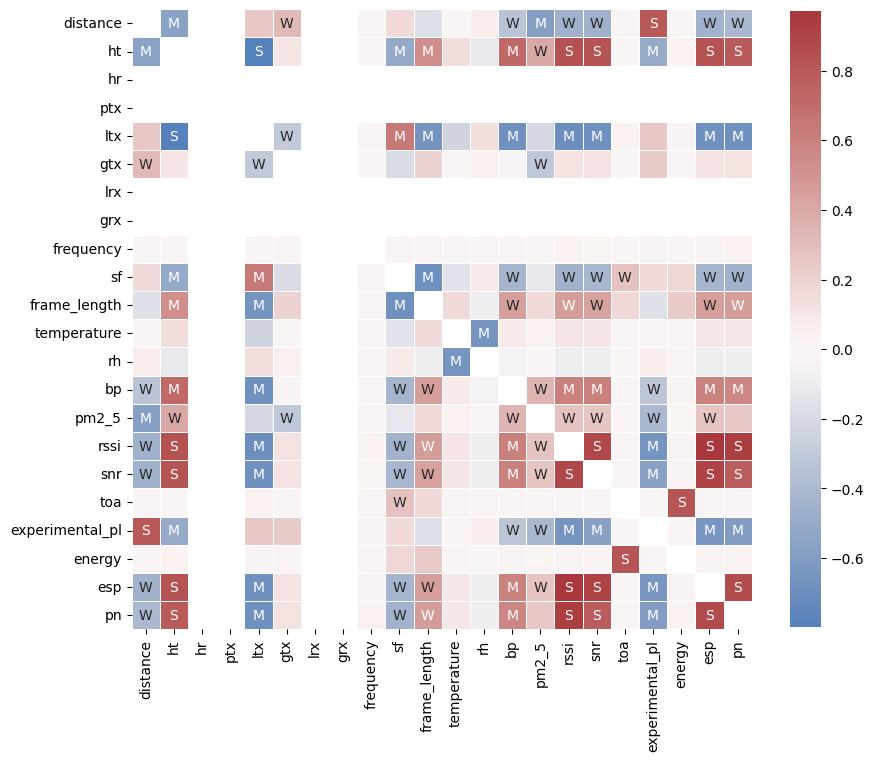

In [16]:
compute_corr(ds.drop(columns=['timestamp', 'device_id']), "kendall")


In [24]:
from scipy.stats import pearsonr

corr = []

for col in ds.columns.drop(labels=['timestamp', 'device_id']):
    c, p = pearsonr(ds['distance'], ds[col])
    corr.append([c, p, col])
    print(c)
    print(p)


1.0
0.0
-0.7245596255061421
0.0
nan
nan
nan
nan
0.3139488133932591
0.0
0.7188831505750856
0.0


C:\Users\Sudip Barua\AppData\Local\Temp\ipykernel_18676\2335382095.py:6: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  c, p = pearsonr(ds['distance'], ds[col])


nan
nan
nan
nan
-0.006591226953873916
2.030946936452613e-10
0.20192229914795096
0.0
-0.1401327200209888
0.0
-0.029538221984112576
1.0649294897492426e-178
0.10599976830551555
0.0
-0.4864967107006823
0.0
-0.5936279769440551
0.0
-0.6030062388280083
0.0
-0.5992606586709344
0.0
0.024986909180629513
1.9640652359797364e-128
0.9025317286189147
0.0
0.024796131780774486
1.6489168476908337e-126
-0.5637679182062274
0.0
-0.5097052953504037
0.0


In [26]:
from scipy.stats import spearmanr

corr = []

for col in ds.columns.drop(labels=['timestamp', 'device_id']):
    c, p = spearmanr(ds['distance'], ds[col])
    corr.append([c, p, col])


C:\Users\Sudip Barua\AppData\Local\Temp\ipykernel_18676\3617337275.py:6: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  c, p = spearmanr(ds['distance'], ds[col])


In [28]:
from scipy.stats import kendalltau

corr = []

for col in ds.columns.drop(labels=['timestamp', 'device_id']):
    c, p = kendalltau(ds['distance'], ds[col])
    corr.append([c, p, col])


In [29]:
corr

[[1.0, 0.0, 'distance'],
 [-0.561107724155716, 0.0, 'ht'],
 [nan, nan, 'hr'],
 [nan, nan, 'ptx'],
 [0.24979167601119534, 0.0, 'ltx'],
 [0.32748268136971836, 0.0, 'gtx'],
 [nan, nan, 'lrx'],
 [nan, nan, 'grx'],
 [-0.004899327168621434, 2.6645832724981018e-09, 'frequency'],
 [0.1605817319903027, 0.0, 'sf'],
 [-0.16508363674396417, 0.0, 'frame_length'],
 [-0.012237948312105345, 1.3931502640784905e-55, 'temperature'],
 [0.07479039103493265, 0.0, 'rh'],
 [-0.3389116382541537, 0.0, 'bp'],
 [-0.5821163007407221, 0.0, 'pm2_5'],
 [-0.45710951839931263, 0.0, 'rssi'],
 [-0.45342990818558193, 0.0, 'snr'],
 [0.007918541366441949, 1.7786279297914984e-21, 'toa'],
 [0.8004166369833894, 0.0, 'experimental_pl'],
 [-0.010935450910368637, 5.1391819961039256e-45, 'energy'],
 [-0.45274426422189795, 0.0, 'esp'],
 [-0.4083357815157932, 0.0, 'pn']]